
***
# Algorithmic fairness in a model of testing and hiring

In [108]:
Clear[pA, pB, hA, hB, nA, nB, tA, tB]

**Our parameters of interest are listed below:**

- pA and pB are prevalence (rate of qualification) for groups A and B

- hA and hB are testing precisions for groups A and B

- tA and tB are group-specific hiring thresholds (prob hired if sending a "2")

- nA and nB are number of people in each group

**These equations define functions for the values that populate the confusion matrix.**

In [109]:
truePos[nA_, nB_, pA_, pB_, hA_, hB_, tA_, 
  tB_]:= {pA nA (hA + (1 - hA) tA), pB nB (hB + (1 - hB) tB)}
falsePos[nA_, nB_, pA_, pB_, hA_, hB_, tA_, 
  tB_]:= {(1 - pA) nA (1 - hA) tA, (1 - pB) nB (1 - hB) tB}
trueNeg[nA_, nB_, pA_, pB_, hA_, hB_, tA_, 
  tB_]:= {(1 - pA) nA (hA + (1 - hA) (1 - tA)), (1 - 
     pB) nB (hB + (1 - hB) (1 - tB))}
falseNeg[nA_, nB_, pA_, pB_, hA_, hB_, tA_, 
  tB_]:= {pA nA (1 - hA) (1 - tA), pB nB (1 - hB) (1 - tB)}

**These equations define functions for the rates that are used in measures of algorithmic fairness.**

In [113]:
TPR[nA_, nB_, pA_, pB_, hA_, hB_, tA_, tB_]:= 
 FullSimplify[
  truePos[nA, nB, pA, pB, hA, hB, tA, 
    tB]/(truePos[nA, nB, pA, pB, hA, hB, tA, tB] + 
     falseNeg[nA, nB, pA, pB, hA, hB, tA, tB])]
TNR[nA_, nB_, pA_, pB_, hA_, hB_, tA_, tB_]:= 
 FullSimplify[
  trueNeg[nA, nB, pA, pB, hA, hB, tA, 
    tB]/(trueNeg[nA, nB, pA, pB, hA, hB, tA, tB] + 
     falsePos[nA, nB, pA, pB, hA, hB, tA, tB])]
PPV[nA_, nB_, pA_, pB_, hA_, hB_, tA_, tB_]:= 
 FullSimplify[
  truePos[nA, nB, pA, pB, hA, hB, tA, 
    tB]/(truePos[nA, nB, pA, pB, hA, hB, tA, tB] + 
     falsePos[nA, nB, pA, pB, hA, hB, tA, tB])]
NPV[nA_, nB_, pA_, pB_, hA_, hB_, tA_, tB_]:= 
 FullSimplify[
  trueNeg[nA, nB, pA, pB, hA, hB, tA, 
    tB]/(trueNeg[nA, nB, pA, pB, hA, hB, tA, tB] + 
     falseNeg[nA, nB, pA, pB, hA, hB, tA, tB])]

**This line of code generates expressions for fairness measures. Remove semicolons and run to see the expressions.**

In [117]:
FullSimplify[TPR[nA, nB, pA, pB, hA, hB, tA, tB]];
FullSimplify[TNR[nA, nB, pA, pB, hA, hB, tA, tB]];
FullSimplify[PPV[nA, nB, pA, pB, hA, hB, tA, tB]];
FullSimplify[NPV[nA, nB, pA, pB, hA, hB, tA, tB]];

**Input these values to graph fairness measures (y-axis) as a function of employer hiring threshold (x-axis).**

-Graphics-
-Graphics-
-Graphics-
-Graphics-
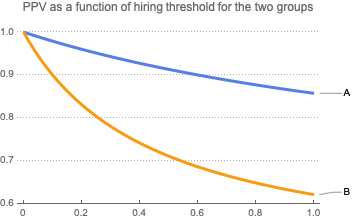
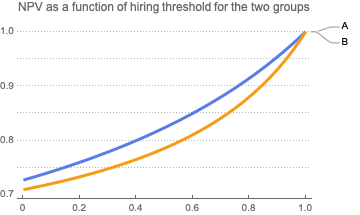
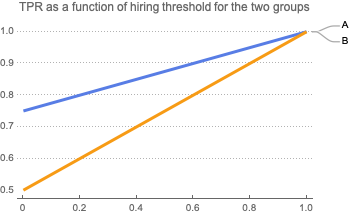
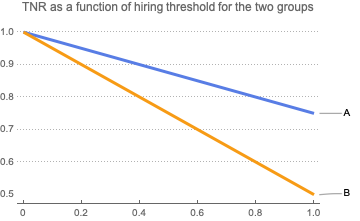

In [121]:
nA = 100;
nB = 100;

hA= .75;
hB=.5;

pA = .6;
pB = .45;

Plot[{PPV[nA, nB, pA, pB, hA, hB, tA, tA][[1]], 
  PPV[nA, nB, pA, pB, hA, hB, tA, tA][[2]]}, {tA, 0, 1}, 
 PlotTheme -> "Business", PlotLabels -> {"A", "B"}, PlotLabel->"PPV as a function of hiring threshold for the two groups"]
 

Plot[{NPV[nA, nB, pA, pB, hA, hB,  tA, tA][[1]], 
  NPV[nA, nB, pA, pB, hA, hB, tA, tA][[2]]}, {tA, 0, 1}, 
 PlotTheme -> "Business", PlotLabels -> {"A", "B"}, PlotLabel->"NPV as a function of hiring threshold for the two groups"]
 

Plot[{TPR[nA, nB, pA, pB, hA, hB, tA, tA][[1]], 
  TPR[nA, nB, pA, pB, hA, hB, tA, tA][[2]]}, {tA, 0, 1}, 
 PlotTheme -> "Business", PlotLabels -> {"A", "B"}, PlotLabel->"TPR as a function of hiring threshold for the two groups"]
 
 
Plot[{TNR[nA, nB, pA, pB, hA, hB, tA, tA][[1]], 
  TNR[nA, nB, pA, pB, hA, hB, tA, tA][[2]]}, {tA, 0, 1}, 
 PlotTheme -> "Business", PlotLabels -> {"A", "B"}, PlotLabel->"TNR as a function of hiring threshold for the two groups"]
 

**Additionally input employer hiring thresholds to generate confusion matrix**

Text[Confusion matrix for Group A at hiring threshold tA = ]   0.5
 
>    SpanFromLeft

Text[True positive]   52.5
 
>    Text[False Negative]   7.5

Text[False Positive]   5.
 
>    Text[True Negative ]   35.
Text[Confusion matrix for Group B at hiring threshold tB = ]   0.75
 
>    SpanFromLeft

Text[True positive]   39.375
 
>    Text[False Negative]   5.625

Text[False Positive]   20.625
 
>    Text[True Negative ]   34.375
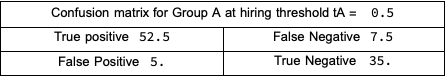
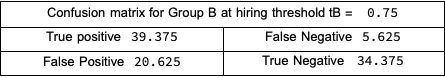

In [136]:
tA = .5;
tB = .75;

Grid[{{Grid[{{Text[
     "Confusion matrix for Group A at hiring threshold tA = "], 
    tA}}], SpanFromLeft},{Grid[{{Text["True positive"], 
      truePos[nA, nB, pA, pB, hA, hB, tA, tB][[1]]}}], 
   Grid[{{Text["False Negative"], 
      falseNeg[nA, nB, pA, pB, hA, hB, tA, tB][[1]]}}]}, {Grid[{{Text[
       "False Positive"], 
      falsePos[nA, nB, pA, pB, hA, hB, tA, tB][[1]]}}], 
   Grid[{{Text["True Negative "], 
      trueNeg[nA, nB, pA, pB, hA, hB, tA, tB][[1]]}}]}}, 
 Frame -> All, ItemSize -> 15]
 
 Grid[{{Grid[{{Text[
     "Confusion matrix for Group B at hiring threshold tB = "], 
    tB}}], SpanFromLeft},{Grid[{{Text["True positive"], 
      truePos[nA, nB, pA, pB, hA, hB, tA, tB][[2]]}}], 
   Grid[{{Text["False Negative"], 
      falseNeg[nA, nB, pA, pB, hA, hB, tA, tB][[2]]}}]}, {Grid[{{Text[
       "False Positive"], 
      falsePos[nA, nB, pA, pB, hA, hB, tA, tB][[2]]}}], 
   Grid[{{Text["True Negative "], 
      trueNeg[nA, nB, pA, pB, hA, hB, tA, tB][[2]]}}]}}, 
 Frame -> All, ItemSize -> 15]
 

***
## Optimality from Employer's standpoint

In [142]:
Clear[pA, pB, hA, hB, nA, nB, tA, tB, U, w]

- Employer receives benefit U for hiring a qualified worker, 0 for hiring unqualified worker, pays wage w for hiring any worker. 

- Worker receives wage w if hired.

**Input U, w, and other parameters to find optimal hiring strategy for employer. These are graphs of the employer's (worker's) total payoff as a function of the employer's hiring threshold t for the three groups -- A, B, everyone. Payoffs are on x-axis and hiring threshold is on the y-axis.**

-Graphics-
-Graphics-
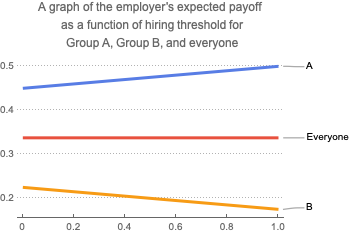
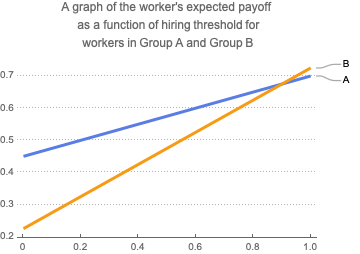

In [143]:
U = 2;
w = 1;

nA = 100;
nB = 100;

hA= .75;
hB=.5;

pA = .6;
pB = .45;

Plot[{(U - w) (pA hA + pA (1 - hA) t ) - 
   w (1 - pA) (1 - hA) t, (U - w) (pB hB + pB (1 - hB) t ) - 
   w (1 - pB) (1 - 
      hB) t, (nA/(nA + nB)) ((U - w) (pA hA + pA (1 - hA) t ) - 
      w (1 - pA) (1 - hA) t) + (nB/(nA + 
        nB)) ((U - w) (pB hB + pB (1 - hB) t ) - 
      w (1 - pB) (1 - hB) t)}, {t, 0, 1}, PlotTheme -> "Business", 
 PlotLabels -> {"A", "B", "Everyone"}, PlotLabel->"A graph of the employer's expected payoff\n as a function of hiring threshold for\n Group A, Group B, and everyone"]
 
 Plot[{w (pA (hA + (1 - hA) t) + (1 - pA) (1 - hA) t), 
  w (pB (hB + (1 - hB) t) + (1 - pB) (1 - hB) t)}, {t, 0, 1}, 
 PlotTheme -> "Business", PlotLabels -> {"A", "B"}, PlotLabel->"A graph of the worker's expected payoff\n as a function of hiring threshold for\n workers in Group A and Group B"]
 

**The function "tStar" below calculates E's optimal hiring threshold for the individual groups and for everyone when group identities are hidden. It is of the form tStar={optimal for A, optimal for B, optimal if group hidden} and each value is 0 or 1.**

In [155]:
tStar[nA_, nB_, pA_, pB_, hA_, 
  hB_] := {If[pA (1 - hA)/(pA (1 - hA) + (1 - pA) (1 - hA)) >= w/U, 
   1, 0], If[pB (1 - hB)/(pB (1 - hB) + (1 - pB) (1 - hB)) >= w/U, 1, 
   0],
  If[(nA/(nA + 
          nB)) (pA (1 - 
           hA)/(pA (1 - hA) + (1 - pA) (1 - hA))) + (nB/(nA + 
          nB)) (pB (1 - hB)/(pB (1 - hB) + (1 - pB) (1 - hB))) >= 
    w/U, 1, 0]
  }

Text[Optimal hiring threshold for Group A]   1

Text[Optimal hiring threshold for Group B]   0

Text[Optimal hiring threshold if group not observed]   1
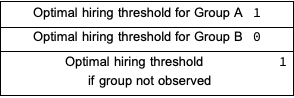

In [156]:

Grid[{{Grid[{{Text["Optimal hiring threshold for Group A"], 
      tStar[nA, nB, pA, pB, hA, hB][[1]]}}]}, {Grid[{{Text[
       "Optimal hiring threshold for Group B"], 
      tStar[nA, nB, pA, pB, hA, hB][[2]]}}]}, {Grid[{{Text[
       "Optimal hiring threshold if group not observed"], 
      tStar[nA, nB, pA, pB, hA, hB][[3]]}}]}}, Frame -> All, 
 ItemSize -> 20]



**Finally, we' ll look at expected payoffs when group identities are hidden from the employer (so that E must use a common hiring threshold for the two groups) and when identities are visible, both assuming that E is hiring optimally according to tStar. We'll start by printing out the confusion matrix for each group in each case.**

Confusion matrix for Group A when E observes group identity   SpanFromLeft

Text[True positive]   60.                                     Text[False Negative]   0.

Text[False Positive]   10.                                    Text[True Negative ]   30.
Confusion matrix for Group A when E does not observe group identity
 
>    SpanFromLeft

Text[True positive]   60.
 
>    Text[False Negative]   0.

Text[False Positive]   10.
 
>    Text[True Negative ]   30.
Confusion matrix for Group B when E observes group identity   SpanFromLeft

Text[True positive]   22.5                                    Text[False Negative]   22.5

Text[False Positive]   0.                                     Text[True Negative ]   55.
Confusion matrix for Group B when E does not observe group identity
 
>    SpanFromLeft

Text[True positive]   45.
 
>    Text[False Negative]   0.

Text[False Positive]   27.5
 
>    Text[True Negative ]   27.5
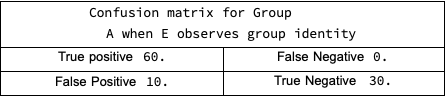
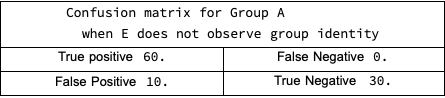
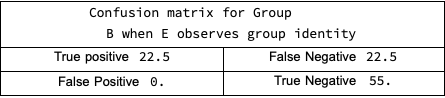
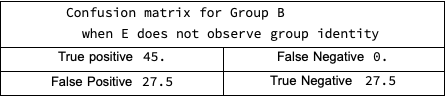

In [158]:
Grid[{{"Confusion matrix for Group A when E observes group identity", SpanFromLeft},{Grid[{{Text["True positive"], 
      truePos[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[1]], tB][[1]]}}], 
   Grid[{{Text["False Negative"], 
      falseNeg[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[1]], tB][[
       1]]}}]}, {Grid[{{Text["False Positive"], 
      falsePos[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[1]], tB][[1]]}}], 
   Grid[{{Text["True Negative "], 
      trueNeg[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[1]], tB][[1]]}}]}}, 
 Frame -> All, ItemSize -> 15]
 
 Grid[{{"Confusion matrix for Group A when E does not observe group identity", SpanFromLeft},{Grid[{{Text["True positive"], 
      truePos[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[3]], tB][[1]]}}], 
   Grid[{{Text["False Negative"], 
      falseNeg[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[3]], tB][[
       1]]}}]}, {Grid[{{Text["False Positive"], 
      falsePos[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[3]], tB][[1]]}}], 
   Grid[{{Text["True Negative "], 
      trueNeg[nA, nB, pA, pB, hA, hB, 
        tStar[nA, nB, pA, pB, hA, hB][[3]], tB][[1]]}}]}}, 
 Frame -> All, ItemSize -> 15]
 
 Grid[{{"Confusion matrix for Group B when E observes group identity", SpanFromLeft},{Grid[{{Text["True positive"], 
      truePos[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[2]]][[2]]}}], 
   Grid[{{Text["False Negative"], 
      falseNeg[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[2]]][[2]]}}]}, {Grid[{{Text[
       "False Positive"], 
      falsePos[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[2]]][[2]]}}], 
   Grid[{{Text["True Negative "], 
      trueNeg[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[2]]][[2]]}}]}}, Frame -> All, 
 ItemSize -> 15]
 
 Grid[{{"Confusion matrix for Group B when E does not observe group identity", SpanFromLeft},{Grid[{{Text["True positive"], 
      truePos[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[3]]][[2]]}}], 
   Grid[{{Text["False Negative"], 
      falseNeg[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[3]]][[2]]}}]}, {Grid[{{Text[
       "False Positive"], 
      falsePos[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[3]]][[2]]}}], 
   Grid[{{Text["True Negative "], 
      trueNeg[nA, nB, pA, pB, hA, hB, tA, 
        tStar[nA, nB, pA, pB, hA, hB][[3]]][[2]]}}]}}, Frame -> All, 
 ItemSize -> 15]



**Finally, the expected payoffs of the Employer and the workers of both groups are below. Two cases are considered.  One is where E hires optimally and can observe group identities, and the other is where E hires optimally and group identities are not observed.**

Employer's expected  payoff in equilibrium (assuming hiring threshold is optimal for E)

Text[Group identities observed]   0.3625

Text[Group identities hidden]   0.3375
Group A's expected payoff in equilibrium

Text[Group identity observed]   0.7

Text[Group identity hidden]   0.7
Group B's expected payoff in equilibrium

Text[Group identity observed]   0.225

Text[Group identity hidden]   0.725
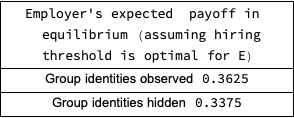
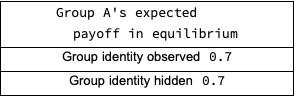
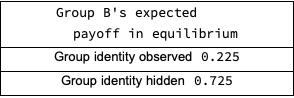

In [165]:
Grid[{{"Employer's expected  payoff in equilibrium (assuming hiring threshold is optimal for E)"},{Grid[{{Text["Group identities observed" ], 
      N[(nA/(nA + 
             nB)) ((U - w) (pA hA + 
              pA (1 - hA) tStar[nA, nB, pA, pB, hA, hB][[1]] ) - 
           w (1 - pA) (1 - hA) tStar[nA, nB, pA, pB, hA, hB][[
             1]]) + (nB/(nA + 
             nB)) (((U - w) (pB hB + 
               pB (1 - hB) tStar[nA, nB, pA, pB, hA, hB][[2]] ) - 
            w (1 - pB) (1 - hB) tStar[nA, nB, pA, pB, hA, hB][[
              2]]))]}}]},
  {Grid[{{Text["Group identities hidden"  ], 
      N[(nA/(nA + 
             nB)) ((U - w) (pA hA + 
              pA (1 - hA) tStar[nA, nB, pA, pB, hA, hB][[3]] ) - 
           w (1 - pA) (1 - hA) tStar[nA, nB, pA, pB, hA, hB][[
             3]]) + (nB/(nA + 
             nB)) (((U - w) (pB hB + 
               pB (1 - hB) tStar[nA, nB, pA, pB, hA, hB][[3]] ) - 
            w (1 - pB) (1 - hB) tStar[nA, nB, pA, pB, hA, hB][[
              3]]))]}}]}}, Frame -> All, ItemSize -> 20]
              
Grid[{{"Group A's expected payoff in equilibrium"}, {Grid[{{Text["Group identity observed"], 
      w pA (hA + ((1 - hA)) tStar[nA, nB, pA, pB, hA, hB][[1]]) + 
       w (1 - pA) (1 - hA) tStar[nA, nB, pA, pB, hA, hB][[
         1]]}}]}, {Grid[{{Text["Group identity hidden"], 
      w pA (hA + ((1 - hA)) tStar[nA, nB, pA, pB, hA, hB][[3]]) + 
       w (1 - pA) (1 - hA) tStar[nA, nB, pA, pB, hA, hB][[3]]}}]}}, 
 Frame -> All, ItemSize -> 20]
 

Grid[{{"Group B's expected payoff in equilibrium"},{Grid[{{Text["Group identity observed"], 
      w pB (hB + ((1 - hB)) tStar[nA, nB, pA, pB, hA, hB][[2]]) + 
       w (1 - pB) (1 - hB) tStar[nA, nB, pA, pB, hA, hB][[
         2]]}}]}, {Grid[{{Text["Group identity hidden"], 
      w pB (hB + ((1 - hB)) tStar[nA, nB, pA, pB, hA, hB][[3]]) + 
       w (1 - pB) (1 - hB) tStar[nA, nB, pA, pB, hA, hB][[3]]}}]}}, 
 Frame -> All, ItemSize -> 20]

In [ ]:
Clear[pA, pB, hA, hB, nA, nB, tA, tB, U, w]